# **Laboratorium 4**

## Perceptron, problem xor

### Zadanie 1

Próba rozwiązania problemu xor z wykorzystaniem pojedynczego perceptronu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array ([ [0,0],    #dane wejściowe
                [0,1],
                [1,0],
                [1,1] ])
d = np.array ([ 1,        #wartości oczekiwane
                0,
                0,
                1 ])

In [5]:
waga=np.random.random(3)  #losowanie wag

In [6]:
mi=0.1  # współczynnik uczenia perceptoronu

k=100 
     

## uczenie perceptronu
for j in range(0,100):
  f=0
  for i in range( len(x) ):
    xx=x[i]
    dd=d[i]

    s=xx[0]*waga[1] + xx[1]*waga[2] + waga[0]*(-1)
    if s>=0:
      y=0
    else:
      y=1

    waga[0]=waga[0] + mi*(y-dd)*(-1)    # modyfikacja wag
    waga[1]=waga[1] + mi*(y-dd)*(xx[0]) #
    waga[2]=waga[2] + mi*(y-dd)*(xx[1]) #

    if (y-dd)!=0:
      f+=1; 

  if f==0: 
    k=(j+1) 
    break; 
##

print("Liczba wykonanych iteracji: "+str(k)) 

Liczba wykonanych iteracji: 100


In [7]:
# efekty uczenia perceptronu

for i in range( len(x) ):
  xx=x[i]
  dd=d[i]

  s=xx[0]*waga[1] + xx[1]*waga[2] + waga[0]*(-1)
  if s>=0:
    y=0
  else:
    y=1
  
  print(" wartość oczekiwana d:",dd,"wynik y:",y)

 wartość oczekiwana d: 1 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 1
 wartość oczekiwana d: 1 wynik y: 1


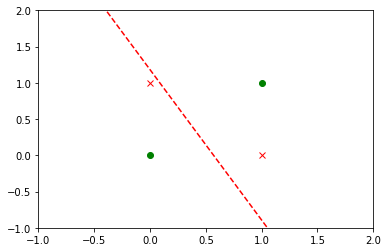

In [10]:
xx=np.arange(-1,3)
yy=-(waga[1]/waga[2]) * xx + (waga[0]/waga[2])
plt.plot(xx, yy, 'r--')       #czerwona, przerywana: 
                              #         linia decyzyjna po procesie uczenia


for i in range(len(x)):
  if d[i]==0:
    plt.plot(x[i,0],x[i,1],'rx')
  else:
    plt.plot(x[i,0],x[i,1],'go')
plt.axis([-1,2,-1,2])
plt.show()

Pojedynczy perceptron nie może rozwiązać problemu xor. <br>
Ponieważ problem ten nie jest liniowo separowalny.

### Zadanie 2

Przygotowanie dwóch perceptronów p1 i p2.

In [24]:
d1 = np.array ([ 0,     #d1 - próbka dla perceptronu p1
                 0,
                 0,
                 1 ])
d2 = np.array ([ 1,     #d2 - próbka dla perceptronu p2
                 0,
                 0,
                 0 ])

In [25]:
wagaP1=np.random.random(3)  #losowanie wag dla perceptronu p1
wagaP2=np.random.random(3)  #losowanie wag dla perceptronu p2

In [32]:
y1=np.zeros((4), dtype=int) #odpowiedź perceptronu p1
y2=np.zeros((4), dtype=int) #odpowiedź perceptronu p2

In [33]:
mi=0.1  # współczynnik uczenia perceptoronu

k=100 
     
## uczenie perceptronu p1 i p2
for j in range(0,100):
  f=0
  for i in range( len(x) ):
    xx=x[i]
    ddP1=d1[i]
    ddP2=d2[i]

    sP1=xx[0]*wagaP1[1] + xx[1]*wagaP1[2] + wagaP1[0]*(-1)
    sP2=xx[0]*wagaP2[1] + xx[1]*wagaP2[2] + wagaP2[0]*(-1)

    if sP1>=0:
      y1[i]=0
    else:
      y1[i]=1

    if sP2>=0:
      y2[i]=0
    else:
      y2[i]=1  

    wagaP1[0]=wagaP1[0] + mi*(y1[i]-ddP1)*(-1)    # modyfikacja wag dla p1
    wagaP1[1]=wagaP1[1] + mi*(y1[i]-ddP1)*(xx[0]) #
    wagaP1[2]=wagaP1[2] + mi*(y1[i]-ddP1)*(xx[1]) #

    wagaP2[0]=wagaP2[0] + mi*(y2[i]-ddP2)*(-1)    # modyfikacja wag dla p2
    wagaP2[1]=wagaP2[1] + mi*(y2[i]-ddP2)*(xx[0]) #
    wagaP2[2]=wagaP2[2] + mi*(y2[i]-ddP2)*(xx[1]) #

    if (y1[i]-ddP1)!=0 or (y2[i]-ddP2)!=0:
      f+=1; 

  if f==0: 
    k=(j+1) 
    break; 
##

print("Liczba wykonanych iteracji: "+str(k)) 

Liczba wykonanych iteracji: 1


In [34]:
# efekty uczenia perceptronu p1

for i in range( len(x) ): 
  print(" wartość oczekiwana d:",d1[i],"wynik y:",y1[i])

 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 1 wynik y: 1


In [35]:
# efekty uczenia perceptronu p2

for i in range( len(x) ):
  print(" wartość oczekiwana d:",d2[i],"wynik y:",y2[i])

 wartość oczekiwana d: 1 wynik y: 1
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0


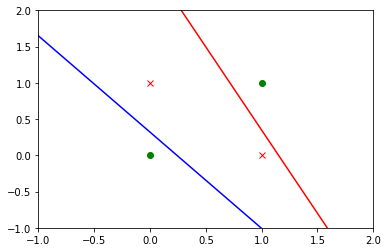

In [36]:
#linie decyzyjne
xx=np.arange(-1,3)
yyP1=-(wagaP1[1]/wagaP1[2]) * xx + (wagaP1[0]/wagaP1[2])
plt.plot(xx, yyP1, 'r-')        #czerwona, ciagłą: 
                                #         linia decyzyjna perceptronu p1

yyP2=-(wagaP2[1]/wagaP2[2]) * xx + (wagaP2[0]/wagaP2[2])
plt.plot(xx, yyP2, 'b-')        #niebieska, ciagłą: 
                                #         linia decyzyjna perceptronu p2

for i in range(len(x)):
  if d[i]==0:
    plt.plot(x[i,0],x[i,1],'rx')
  else:
    plt.plot(x[i,0],x[i,1],'go')
plt.axis([-1,2,-1,2])
plt.show()

### Zadanie 3

Przygotowanie perceptronu p3, którego danymi wejściowymi będą współrzędne (y1,y2). <br>
y1 - wyjście perceptronu p1 <br>
y2 - wyjście perceptronu p2

In [44]:
wagaP3=np.random.random(3)  #losowanie wag perceptronu p3

In [45]:
mi=0.1  # współczynnik uczenia perceptoronu

k=100 
     
## uczenie perceptronu
for j in range(0,100):
  f=0
  for i in range( len(d) ):
    yy1=y1[i]
    yy2=y2[i]
    dd=d[i]

    s=yy1*wagaP3[1] + yy2*wagaP3[2] + wagaP3[0]*(-1)
    if s>=0:
      y=0
    else:
      y=1

    wagaP3[0]=wagaP3[0] + mi*(y-dd)*(-1)    # modyfikacja wag dla p3
    wagaP3[1]=wagaP3[1] + mi*(y-dd)*(yy1)   #
    wagaP3[2]=wagaP3[2] + mi*(y-dd)*(yy2)   #

    if (y-dd)!=0:
      f+=1; 

  if f==0: 
    k=(j+1) 
    break; 
##

print("Liczba wykonanych iteracji: "+str(k)) 

Liczba wykonanych iteracji: 9


In [48]:
# efekty uczenia perceptronu p3

for i in range( len(x) ):
  yy1=y1[i]
  yy2=y2[i]
  dd=d[i]

  s=yy1*wagaP3[1] + yy2*wagaP3[2] + wagaP3[0]*(-1)
  if s>=0:
    y=0
  else:
    y=1
  
  print(" wartość oczekiwana d:",dd,"wynik y:",y)

 wartość oczekiwana d: 1 wynik y: 1
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 1 wynik y: 1


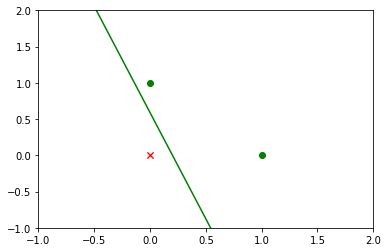

In [51]:
xx=np.arange(-1,3)
yyP3=-(wagaP3[1]/wagaP3[2]) * xx + (wagaP3[0]/wagaP3[2])
plt.plot(xx, yyP3, 'g-')        #zieloną, ciagłą: 
                                #         linia decyzyjna perceptronu p3

for i in range(len(x)):
  if d[i]==0:
    plt.plot(y1[i],y2[i],'rx')
  else:
    plt.plot(y1[i],y2[i],'go')
plt.axis([-1,2,-1,2])
plt.show()

### Zadanie 4

Połączenie perceptronów p1, p2 i p3 w jedną sieć.

In [52]:
# efekty uczenia sieci neuronowej (złożonej z perceptronów p1,p2,p3)

for i in range( len(x) ):
  xx=x[i] #dane wejściowe perceptronów p1 i p2
  dd=d[i] #wartość oczekiwana dla całej sieci

  sP1=xx[0]*wagaP1[1] + xx[1]*wagaP1[2] + wagaP1[0]*(-1)  #perceptron p1
  
  if sP1>=0:
    yy1=0
  else:
    yy1=1                                                 #

  sP2=xx[0]*wagaP2[1] + xx[1]*wagaP2[2] + wagaP2[0]*(-1)  #perceptron p2

  if sP2>=0:
    yy2=0
  else:
    yy2=1                                                 #

  s=yy1*wagaP3[1] + yy2*wagaP3[2] + wagaP3[0]*(-1)        #perceptron p3
  if s>=0:
    y=0
  else:
    y=1                                                   #
  
  print(" wartość oczekiwana d:",dd,"wynik y:",y)

 wartość oczekiwana d: 1 wynik y: 1
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 0 wynik y: 0
 wartość oczekiwana d: 1 wynik y: 1


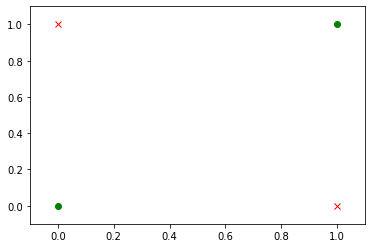

In [56]:
# efekty uczenia sieci neuronowej (złożonej z perceptronów p1,p2,p3)

for i in range( len(x) ):
  xx=x[i] #dane wejściowe perceptronów p1 i p2

  sP1=xx[0]*wagaP1[1] + xx[1]*wagaP1[2] + wagaP1[0]*(-1)  #perceptron p1
  
  if sP1>=0:
    yy1=0
  else:
    yy1=1                                                 #

  sP2=xx[0]*wagaP2[1] + xx[1]*wagaP2[2] + wagaP2[0]*(-1)  #perceptron p2

  if sP2>=0:
    yy2=0
  else:
    yy2=1                                                 #

  s=yy1*wagaP3[1] + yy2*wagaP3[2] + wagaP3[0]*(-1)        #perceptron p3
  if s>=0:
    y=0
  else:
    y=1                                                   #
  
  
  if y==0:                                                #wyświetlenie wyników
    plt.plot(xx[0],xx[1],'rx')                            
  else:
    plt.plot(xx[0],xx[1],'go')

plt.axis([-0.1,1.1,-0.1,1.1])
plt.show()